<a href="https://colab.research.google.com/github/chantiasNK26768/data-science-visualization/blob/main/EXP4_Toyota_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPERIMENT 4 – Toyota Car Data Analysis

## Aim:
To perform exploratory data analysis (EDA) on the Toyota car dataset using Pandas and Seaborn:
- Import and inspect data
- Handle missing values
- Create frequency tables and cross-tabulations
- Compute correlations
- Visualize distributions, correlations, and outliers

**Tools Used:**
- Python
- Pandas
- NumPy
- Matplotlib
- Seaborn
---


*PART A: Importing Required Libraries*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


*PART B: Load Dataset*

In [4]:
df = pd.read_csv('/content/Toyota.csv')
print("First 7 rows of the dataset:")
df.head(7)


First 7 rows of the dataset:


,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,Diesel,90,0.0,0,2000,3,1170
6,6,16900,27.0,??,Diesel,????,NaN,0,2000,3,1245


*PART C: Handling Missing Values & Setting Index*

In [5]:
# Replace '??' and '????' with NaN and set index column
cars_data = pd.read_csv('/content/Toyota.csv', index_col=0, na_values=["??", "????"])
cars_data2 = cars_data.copy(deep=True)


*PART D: Frequency Tables (Categorical Data)*

**FuelType vs Doors**

In [6]:
freq_table = pd.crosstab(cars_data2.FuelType, cars_data2.Doors)
print("Frequency table of FuelType and Doors:\n", freq_table)


Frequency table of FuelType and Doors:
 Doors     2    3    4    5  five  four  three
FuelType                                     
CNG       0    5    2    8     0     0      0
Diesel    1   59   12   71     0     0      1
Petrol    1  516  106  552     1     1      0


**Normalized Frequency Table (Joint Probability)**

In [7]:
norm_freq_table = pd.crosstab(cars_data2.FuelType, cars_data2.Doors, normalize=True)
print("Normalized frequency table (joint probability):\n", norm_freq_table)


Normalized frequency table (joint probability):
 Doors            2         3         4         5      five      four     three
FuelType                                                                      
CNG       0.000000  0.003743  0.001497  0.005988  0.000000  0.000000  0.000000
Diesel    0.000749  0.044162  0.008982  0.053144  0.000000  0.000000  0.000749
Petrol    0.000749  0.386228  0.079341  0.413174  0.000749  0.000749  0.000000


**Marginal Probabilities**

In [8]:
marginal_freq_table = pd.crosstab(cars_data2.FuelType, cars_data2.Doors, normalize=True, margins=True)
print("Marginal probability frequency table (with margins):\n", marginal_freq_table)


Marginal probability frequency table (with margins):
 Doors            2         3         4         5      five      four  \
FuelType                                                               
CNG       0.000000  0.003743  0.001497  0.005988  0.000000  0.000000   
Diesel    0.000749  0.044162  0.008982  0.053144  0.000000  0.000000   
Petrol    0.000749  0.386228  0.079341  0.413174  0.000749  0.000749   
All       0.001497  0.434132  0.089820  0.472305  0.000749  0.000749   

Doors        three       All  
FuelType                      
CNG       0.000000  0.011228  
Diesel    0.000749  0.107784  
Petrol    0.000000  0.880988  
All       0.000749  1.000000  


**Three-way Crosstab: FuelType, Doors, Automatic**

In [9]:
three_way_table = pd.crosstab(cars_data2.FuelType, [cars_data2.Doors, cars_data2.Automatic],
                              normalize=True, margins=True)
rounded_three_way_table = three_way_table.round(2)
print("Rounded three-way cross-tabulation:\n", rounded_three_way_table)


Rounded three-way cross-tabulation:
 Doors        2     3           4           5       five four three   All
Automatic    0     0     1     0     1     0     1    0    1     0      
FuelType                                                                
CNG        0.0  0.00  0.00  0.00  0.00  0.01  0.00  0.0  0.0   0.0  0.01
Diesel     0.0  0.04  0.00  0.01  0.00  0.05  0.00  0.0  0.0   0.0  0.11
Petrol     0.0  0.36  0.02  0.07  0.01  0.39  0.02  0.0  0.0   0.0  0.88
All        0.0  0.41  0.02  0.08  0.01  0.45  0.02  0.0  0.0   0.0  1.00


*PART E: Numerical Data Analysis*

**Extract Numerical Columns**

In [10]:
numerical_data = cars_data2.select_dtypes(exclude=[object])
numerical_data.head()


,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
0,13500,23.0,46986.0,90.0,1.0,0,2000,1165
1,13750,23.0,72937.0,90.0,1.0,0,2000,1165
2,13950,24.0,41711.0,90.0,NaN,0,2000,1165
3,14950,26.0,48000.0,90.0,0.0,0,2000,1165
4,13750,30.0,38500.0,90.0,0.0,0,2000,1170


**Correlation Matrix**

In [11]:
corr_matrix = numerical_data.corr()
print("Correlation matrix of numerical variables:\n", corr_matrix)


Correlation matrix of numerical variables:
               Price       Age        KM        HP  MetColor  Automatic  \
Price      1.000000 -0.878407 -0.574720  0.309902  0.112041   0.033081   
Age       -0.878407  1.000000  0.512735 -0.157904 -0.099659   0.032573   
KM        -0.574720  0.512735  1.000000 -0.335285 -0.093825  -0.081248   
HP         0.309902 -0.157904 -0.335285  1.000000  0.064749   0.013755   
MetColor   0.112041 -0.099659 -0.093825  0.064749  1.000000  -0.013973   
Automatic  0.033081  0.032573 -0.081248  0.013755 -0.013973   1.000000   
CC         0.165067 -0.120706  0.299993  0.053758  0.029189  -0.069321   
Weight     0.581198 -0.464299 -0.026271  0.086737  0.057142   0.057249   

                 CC    Weight  
Price      0.165067  0.581198  
Age       -0.120706 -0.464299  
KM         0.299993 -0.026271  
HP         0.053758  0.086737  
MetColor   0.029189  0.057142  
Automatic -0.069321  0.057249  
CC         1.000000  0.651450  
Weight     0.651450  1.000000  


*PART F: Visualization*

**Correlation Heatmap**

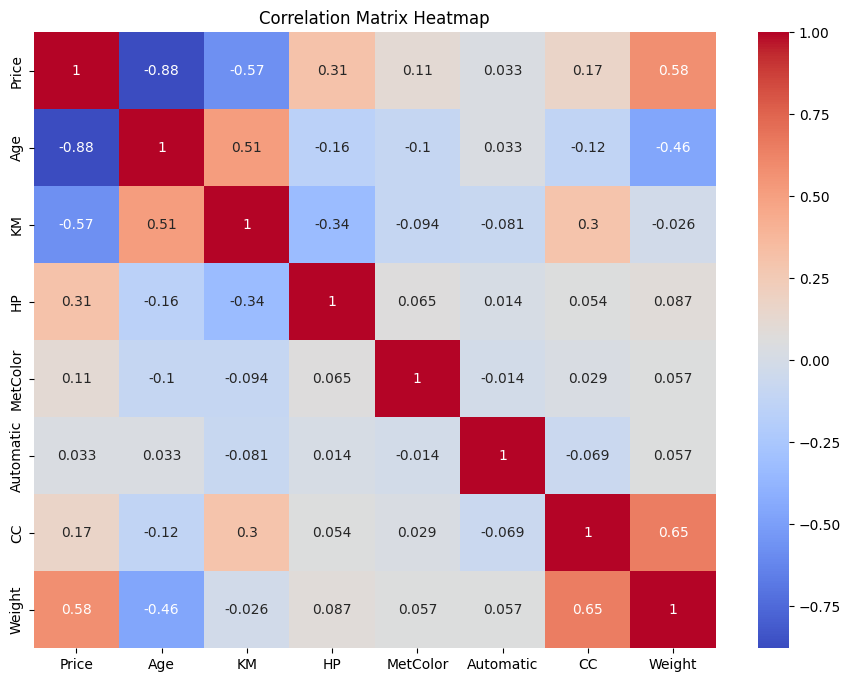

In [12]:
plt.figure(figsize=(11, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


**Histograms**

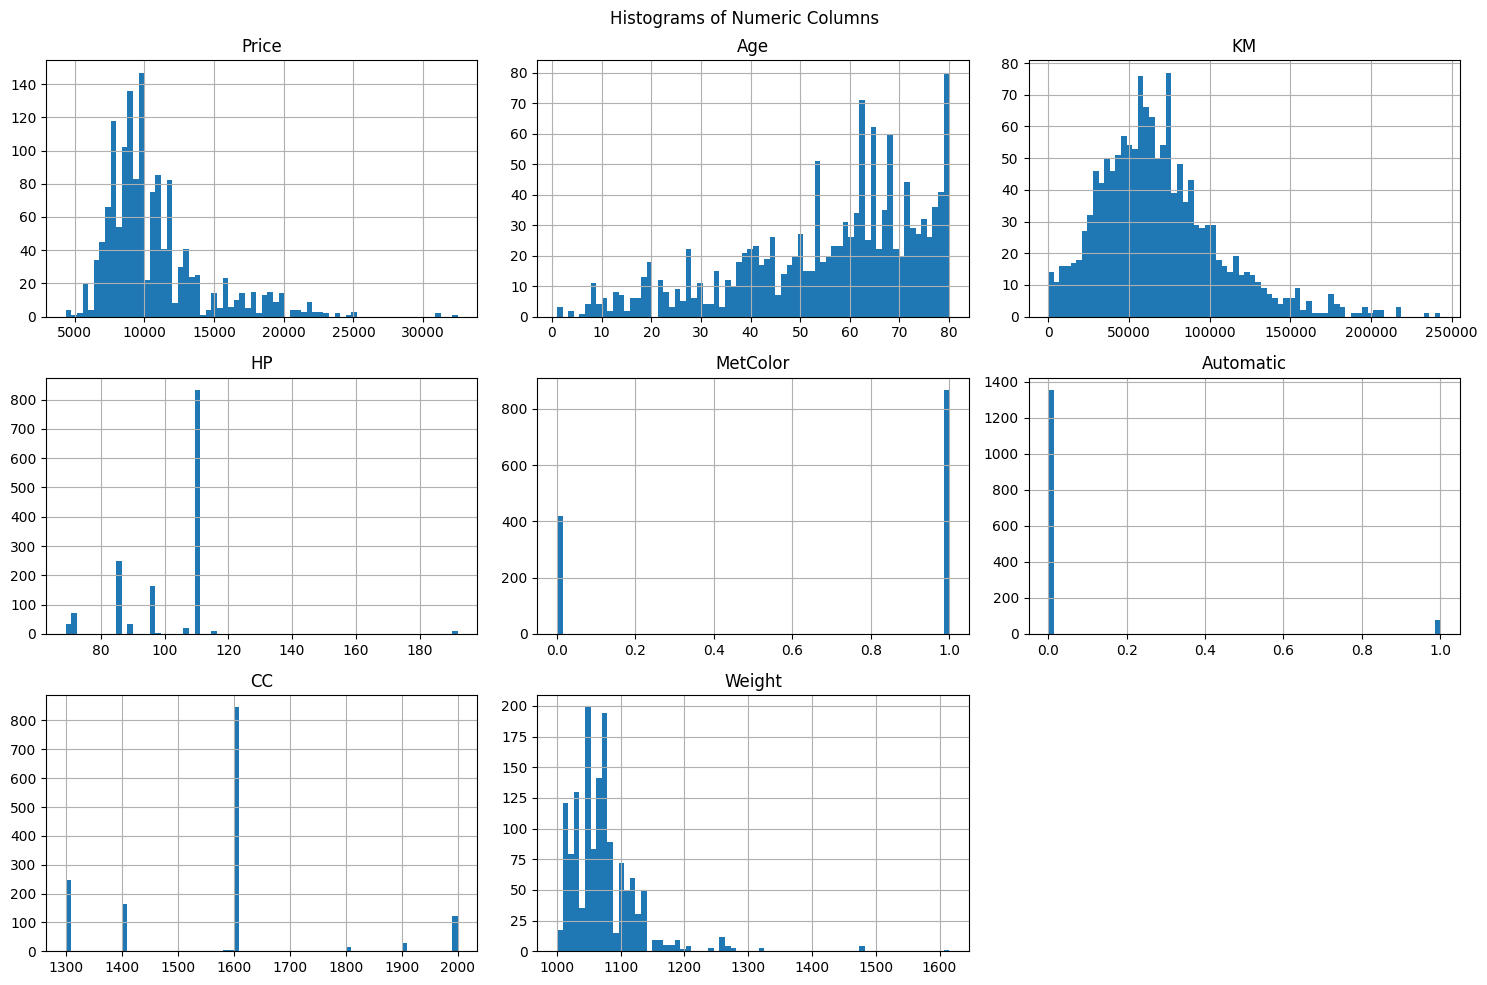

In [13]:
cars_data2.hist(figsize=(15, 10), bins=70)
plt.suptitle('Histograms of Numeric Columns')
plt.tight_layout()
plt.show()


**Pairplot**

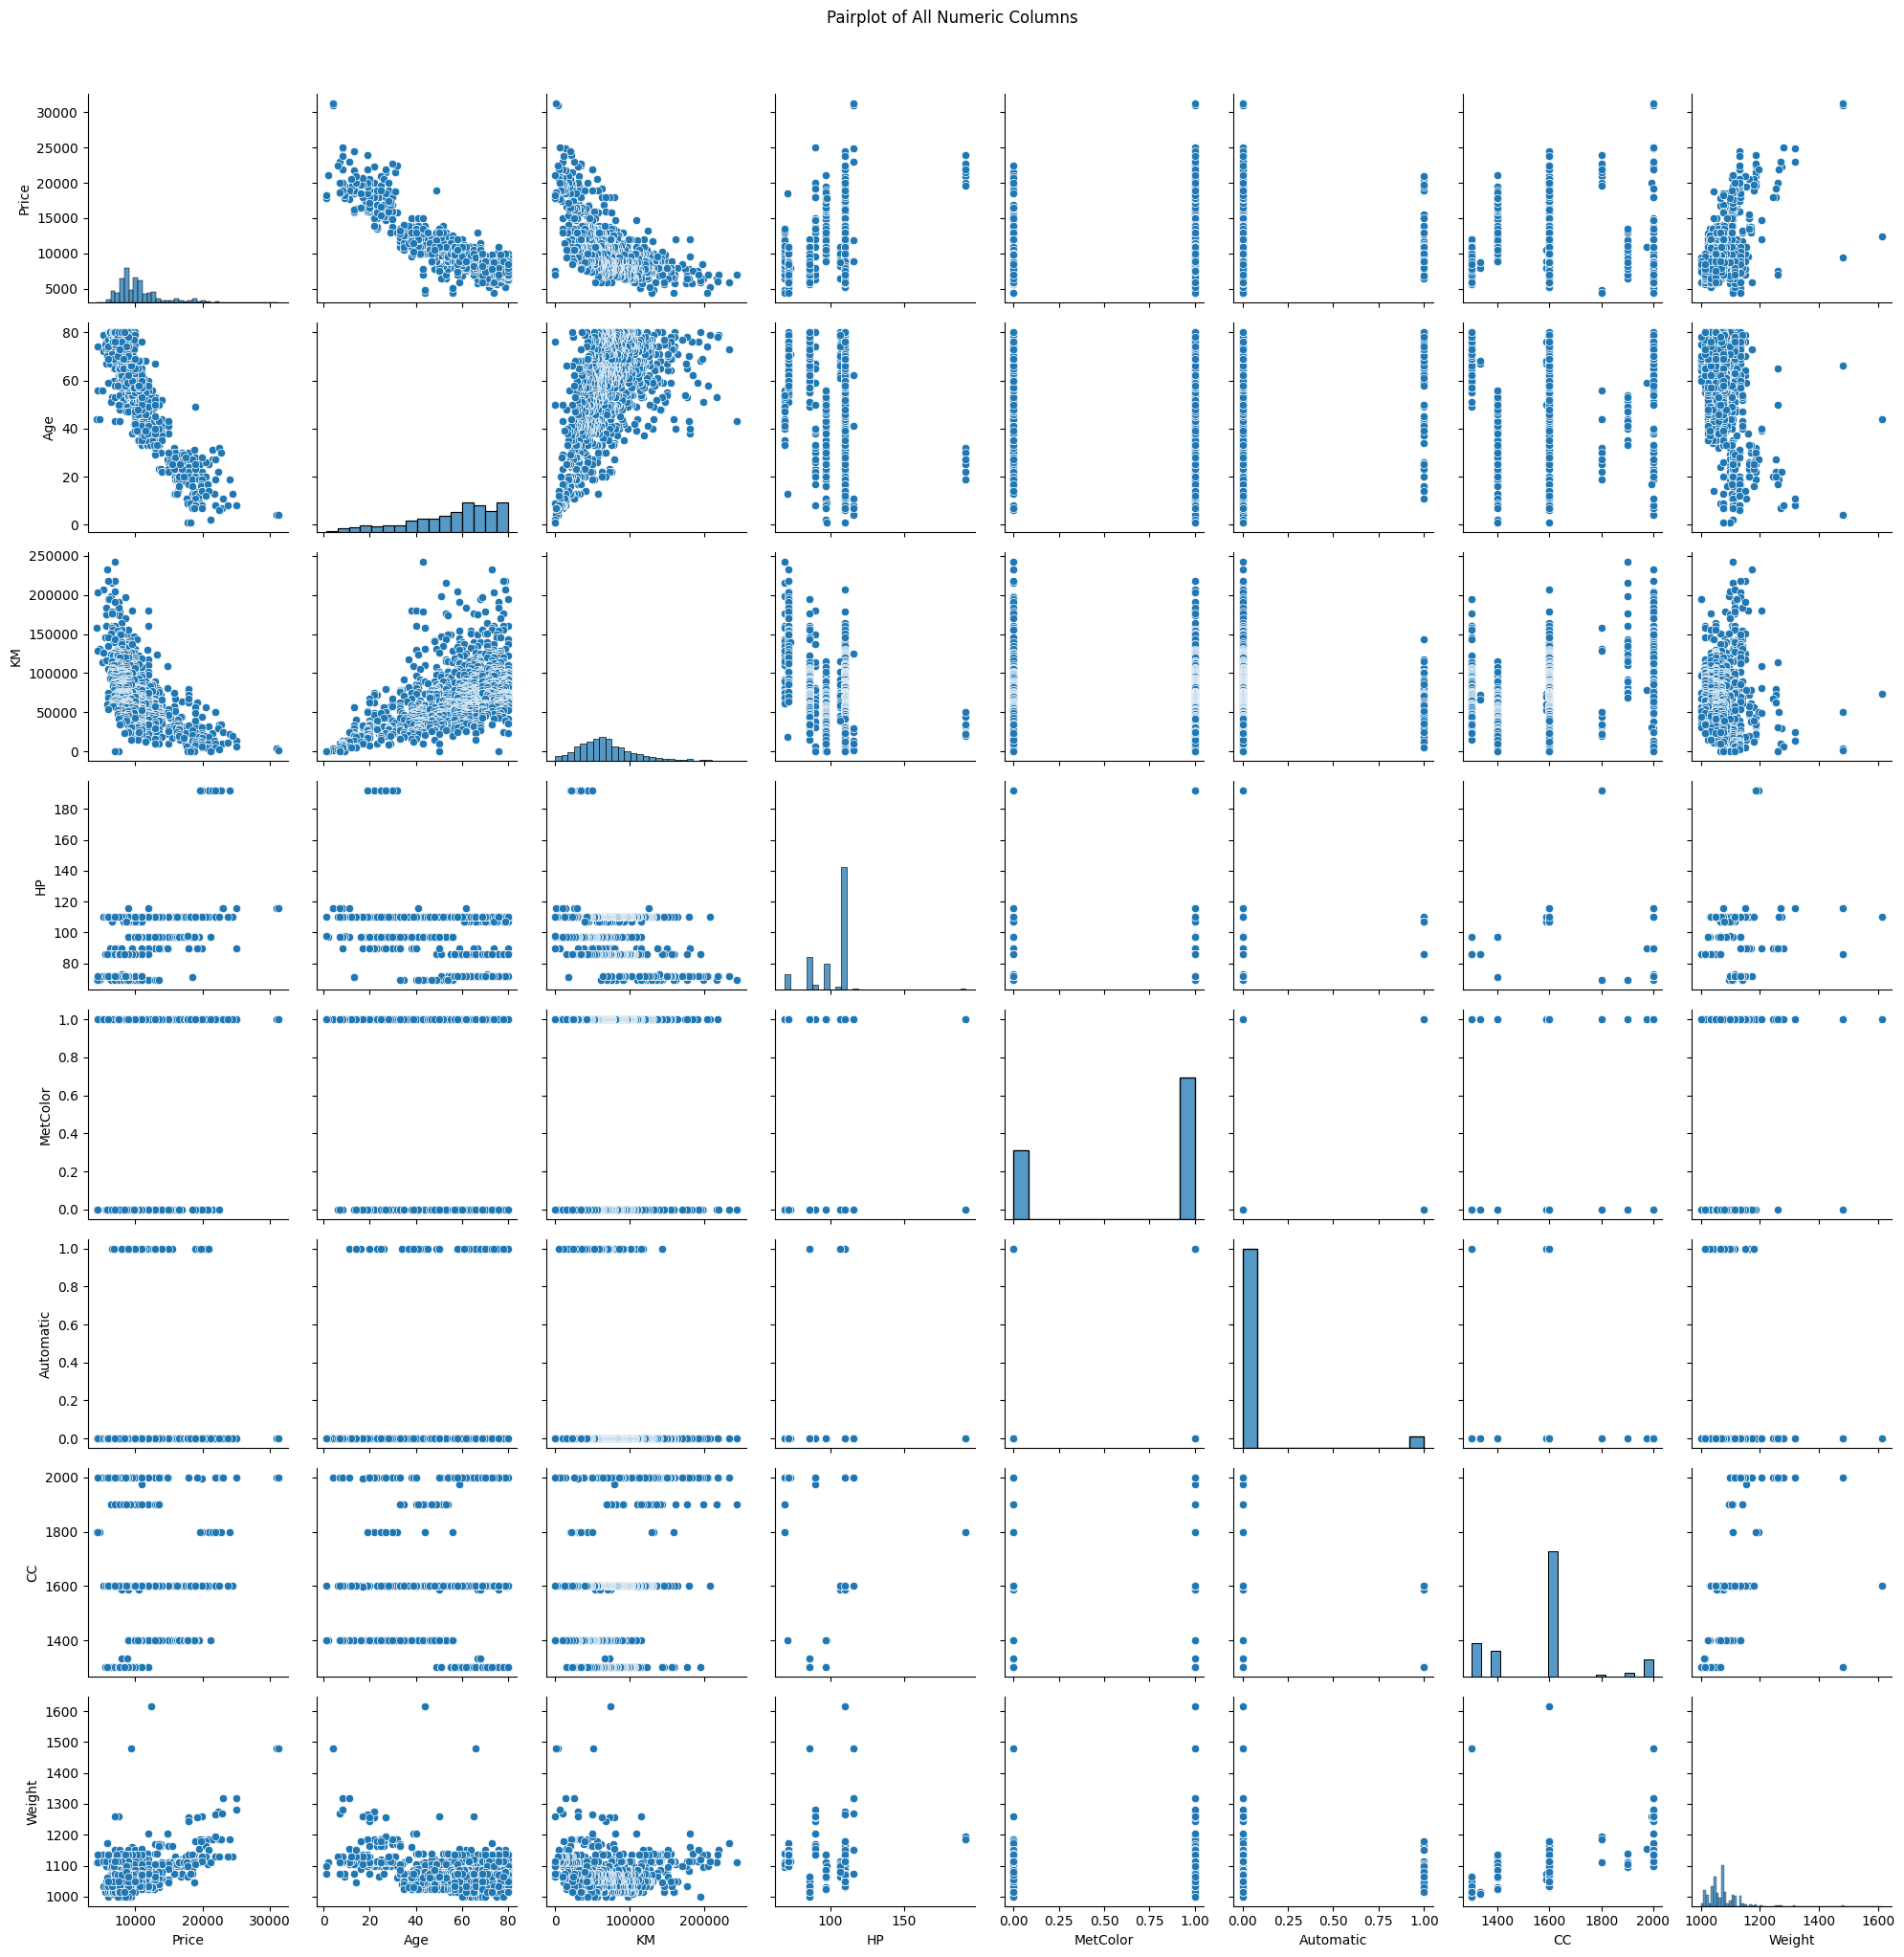

In [14]:
sns.pairplot(cars_data2.dropna())
plt.suptitle("Pairplot of All Numeric Columns", y=1.02)
plt.tight_layout()
plt.show()


**Box Plots (Outliers)**

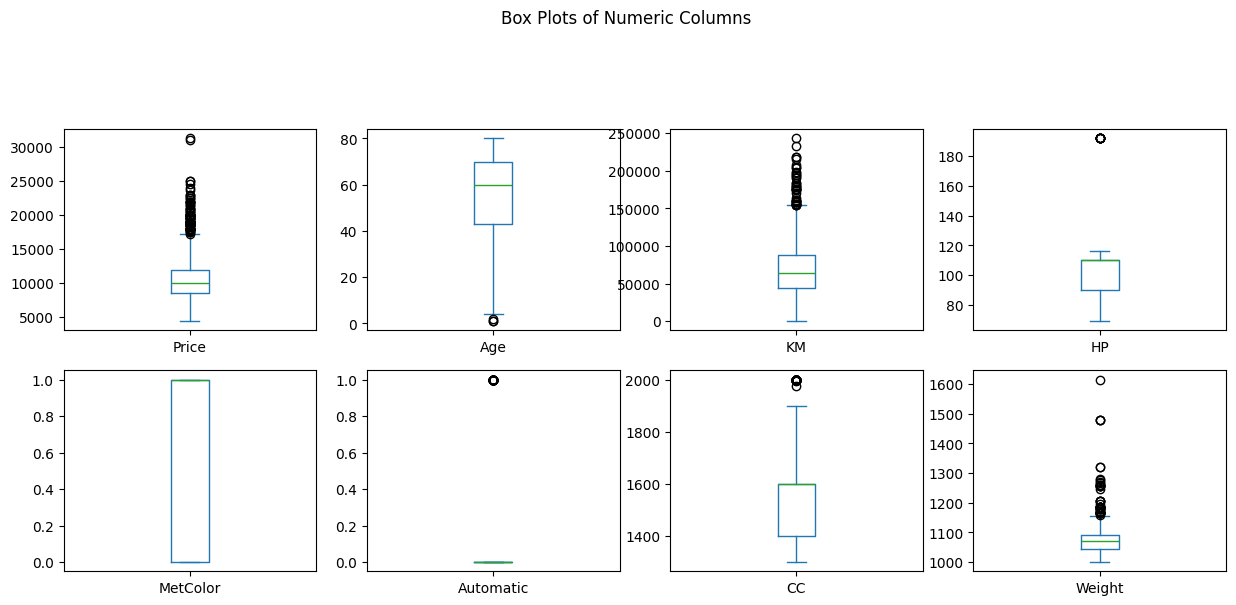

In [15]:
cars_data2.dropna().plot(kind='box', subplots=True, layout=(4,4), figsize=(15,12),
                         sharex=False, sharey=False)
plt.suptitle("Box Plots of Numeric Columns")
plt.show()


Conclusion (Markdown Cell)

### Conclusion:
This experiment performed exploratory data analysis (EDA) on the Toyota car dataset:
- Handled missing values
- Created frequency and normalized tables
- Computed correlation between numerical variables
- Visualized distributions, correlations, and outliers
- EDA helps in understanding relationships and data quality before modeling.
